# Clustering Using K-Means Algorithm

First to understand the concept of K-Means we will try it on toy dataset



In [ ]:
from google.colab import files

data = files.upload()


Saving housing.csv to housing.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [ ]:
x = [ 5,  4, 13, 11, 13,  5,  3,  4,  3, 10, 12, 13, 14, 12, 11,  6,  7,  6,  5, 11, 14, 10]
y = [15, 18, 22, 21, 21, 19, 15, 16, 16, 21, 23, 22, 22, 20, 22, 17, 18, 14, 17, 24, 22, 23]



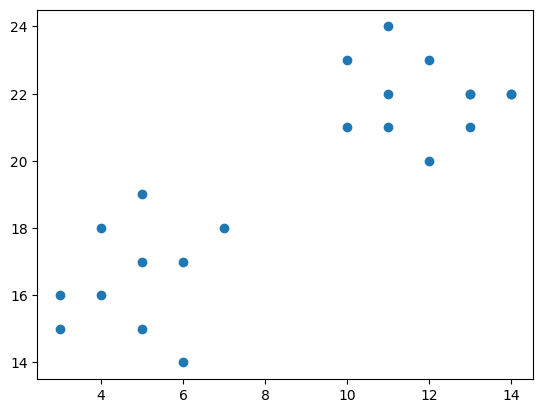

In [ ]:
plt.scatter(x, y)
plt.show()

In [ ]:
data = list(zip(x,y))
print(f"Data: {data}")

Data: [(5, 15), (4, 18), (13, 22), (11, 21), (13, 21), (5, 19), (3, 15), (4, 16), (3, 16), (10, 21), (12, 23), (13, 22), (14, 22), (12, 20), (11, 22), (6, 17), (7, 18), (6, 14), (5, 17), (11, 24), (14, 22), (10, 23)]


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
kmeans.fit(data)

c = kmeans.labels_
c

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
      dtype=int32)

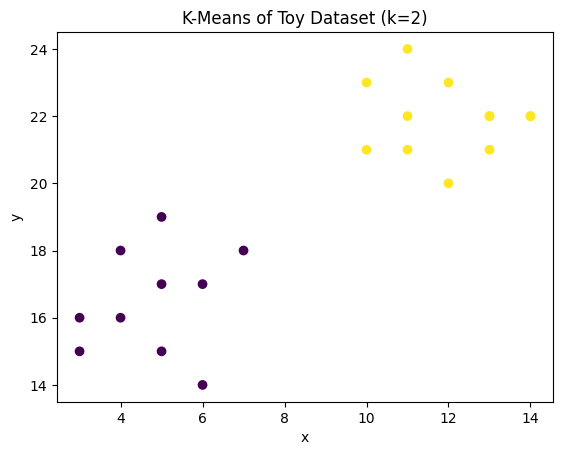

In [ ]:
plt.title("K-Means of Toy Dataset (k=2)")
plt.scatter(x, y, c = kmeans.labels_)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# 1. **Silhouette Coefficient**
The Silhouette Coefficient is defined for each sample and is composed of two scores

> a. The mean distance between a sample and all other points in the same class

> b. The mean distance between a sample and all toher points in the next nearest cluster

`Silhouette Coefficient
> = -1 => Incorrect Cluster

> = 0  => Overlapping Cluster

> = 1  => Dense and separated clusters`

The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.



In [ ]:
from sklearn import metrics

metrics.silhouette_score(data, c, metric='euclidean')

0.7214539689632106

# 2. Calinski-Harabasz Index

Calinski-Harabasz Index or Variance Ratio Criterion can be used to evaluate the model where a higher Calinski score relates to a model with better defined clusters

The index is `ratio of sum of between-clusters dispersion and of within-cluster dispersion for all clusters` (where dispersion is defined as the sum of distances squared)

>

`The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster`
The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

Also the score is fast to compute.




In [ ]:
metrics.calinski_harabasz_score(data, c)

121.287792326368

#3. Davies-Bouldin Index

This index signifies the average 'similarity' between clusters, where the `similarity is a measure that compares the distance between clusters with the size of the clusters themself.`

> * 0 is the lowest possible score and indicates the best partition
> * The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.


In [ ]:
metrics.davies_bouldin_score(data, c)

0.38191565365304037

# Elbow Method

Elbow Method is a technique that we use to `determine the number of centroids(k) to use in a k-means clustering algorithm`.

 In this method to determine the k-value we `continuously iterate for k=1 to k=n (Here n is the hyperparameter that we choose as per our requirement). For every value of k, we calculate the within-cluster sum of squares (WCSS) value`.

This is a method of evaluating for which value of K, the model performs the best on the given dataset.

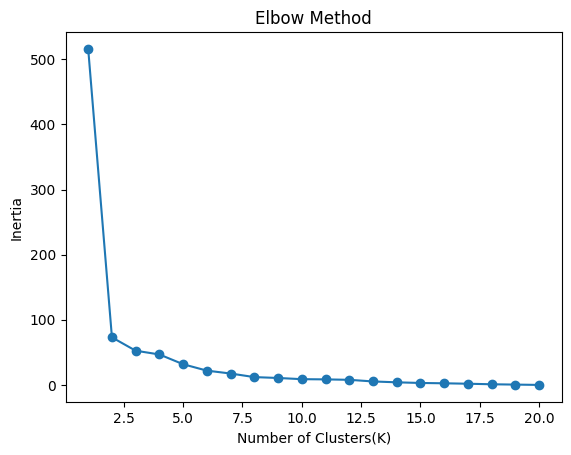

In [ ]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,21):
  kmeans = KMeans(n_clusters=i, n_init='auto')
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,21), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("Inertia")
plt.show()

**Another Toy Dataset**


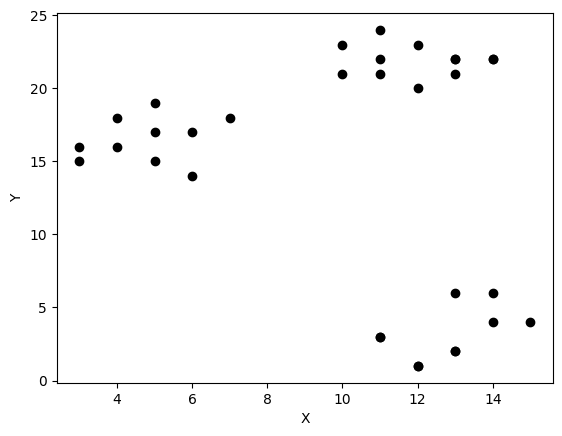

In [ ]:
x = [ 5,  4, 13, 11, 13,  5,  3,  4,  3, 10, 12, 13, 14, 12, 11,  6,  7,  6,  5, 11, 14, 10, 12, 13, 14, 12, 11, 13, 11, 13, 14, 15]
y = [15, 18, 22, 21, 21, 19, 15, 16, 16, 21, 23, 22, 22, 20, 22, 17, 18, 14, 17, 24, 22, 23,  1,  2,  4,  1,  3,  6,  3,  2,  6,  4]

plt.scatter(x, y, color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

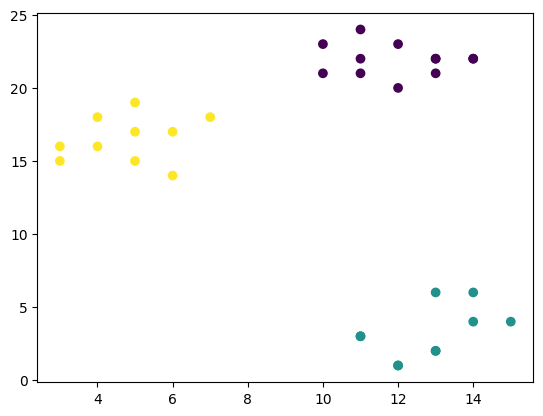

In [ ]:
data = list(zip(x,y))

kmeans = KMeans(n_clusters=3, n_init="auto")
kmeans.fit(data)

c = kmeans.labels_

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

Lets calculate different scores and store them.

In [ ]:
score_dict = {}

silhouette = metrics.silhouette_score(data, c)
calinski = metrics.calinski_harabasz_score(data,c )
davies = metrics.davies_bouldin_score(data, c)

score_dict = {
    "silhouette_score" : silhouette,
    "calinski_harabasz_score" : calinski,
    "davies_bouldin_score" : davies
}
score_dict

{'silhouette_score': 0.7508793049516054,
 'calinski_harabasz_score': 291.097772451713,
 'davies_bouldin_score': 0.3373474870417039}

Also try the Elbow method here too

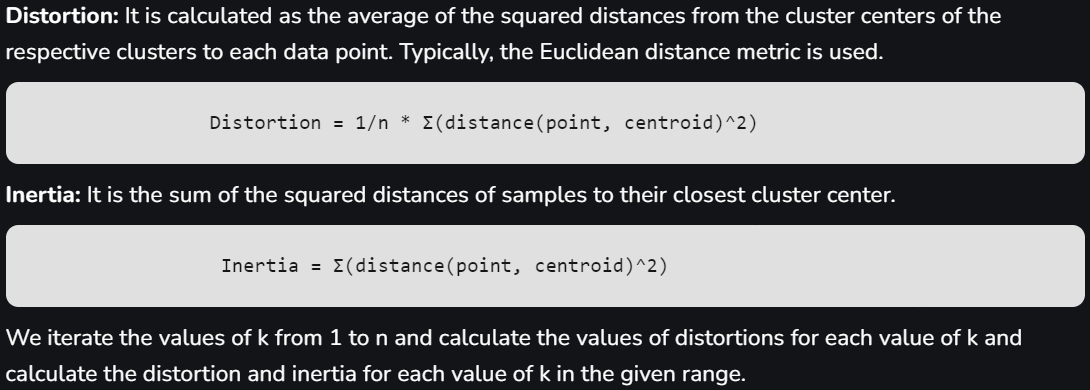

In [ ]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
map1 = {}
map2 = {}

data = np.array(list(zip(x,y)))

for k in range(1,11):

  kmeansModel = KMeans(n_clusters=k, n_init="auto").fit(data)

  distortion = sum(np.min(cdist(data, kmeansModel.cluster_centers_,
                                      'euclidean'), axis=1)) / data.shape[0]
  inertia = kmeansModel.inertia_
  distortions.append(distortion)
  inertias.append(inertia)

  map1[k] = distortion
  map2[k] = inertia



In [ ]:
print("\nMapping 1 distortions: \n");
for key, val in map1.items():
    print(f'{key} : {val}')
print("\nMapping 2 Inertias : \n");
for key, val in map2.items():
    print(f'{key} : {val}')


Mapping 1 distortions: 

1 : 8.426025241878147
2 : 3.8289334647831526
3 : 1.8136396580971574
4 : 1.641988207509732
5 : 1.3314601869211393
6 : 1.151458679970294
7 : 1.063089487471005
8 : 0.9561874783573274
9 : 0.8758395564519805
10 : 0.7755975026102697

Mapping 2 Inertias : 

1 : 2491.5
2 : 561.0181818181819
3 : 118.2166666666667
4 : 97.71666666666667
5 : 68.6
6 : 49.6
7 : 40.83333333333333
8 : 34.16666666666667
9 : 32.43333333333333
10 : 25.500000000000004


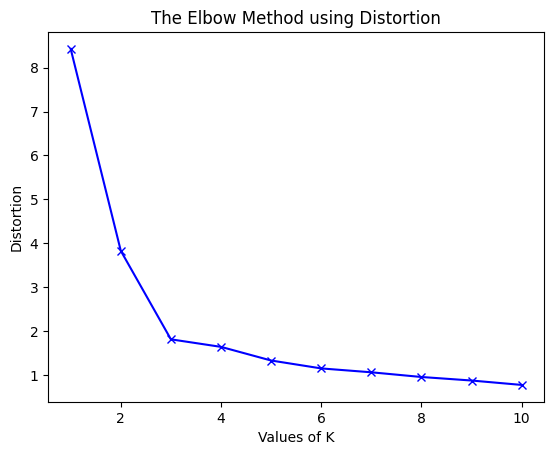

In [ ]:
plt.plot(range(1,11), distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

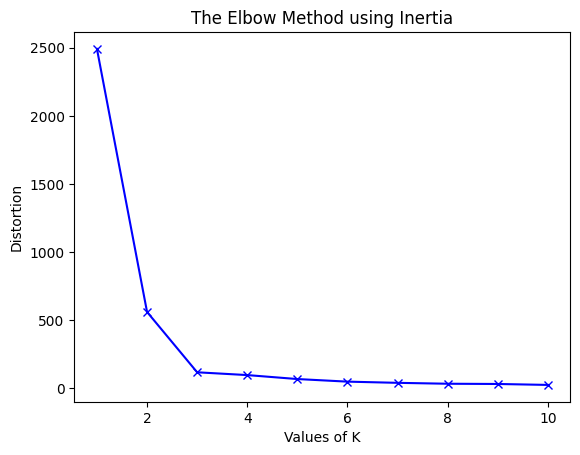

In [ ]:
plt.plot(range(1,11), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Inertia')
plt.show()

**How to Determine which K value to choose from?**
> * `we have to select the value of k at the “elbow” ie the point after which the distortion/inertia starts decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3`

#Clustering data with higher-dimensions


In [ ]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
z = [15, 18, 22, 21, 21, 19, 15, 16, 16, 17]

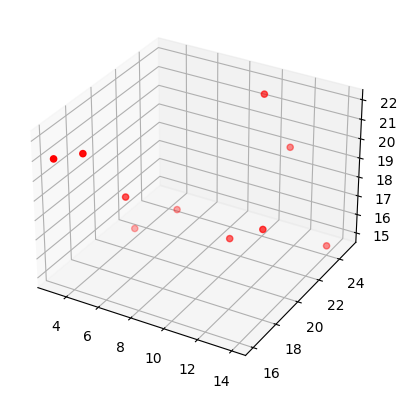

In [ ]:
from mpl_toolkits import mplot3d
axis = plt.axes(projection = "3d")

axis.scatter3D(x, y, z, color='red')
plt.show()

Elbow method to determine the optimal value of k

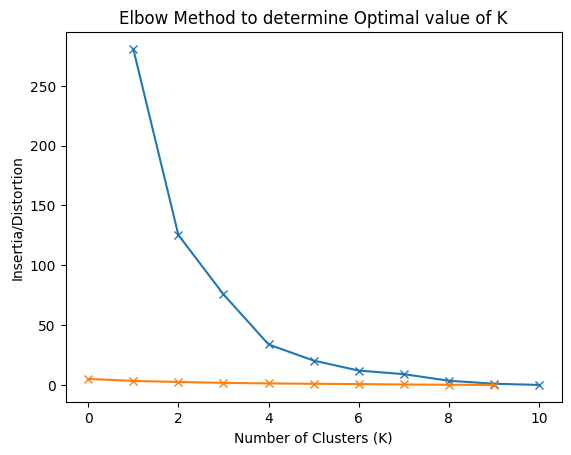

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

data = np.array(list(zip(x, y, z)))
inertias = []
distortions = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, n_init='auto').fit(data)
  inertias.append(kmeans.inertia_)
  distortions.append(sum(np.min(cdist(data, kmeans.cluster_centers_,
                                      'euclidean'), axis=1)) / data.shape[0])

plt.plot(range(1,11), inertias, distortions, marker='x')
plt.title('Elbow Method to determine Optimal value of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Insertia/Distortion')
plt.show()


Hence the optimal value is around 7-9

In [ ]:
score_dict = {}

kmeansModel = KMeans(n_clusters=9, n_init='auto')
kmeansModel.fit(data)
c = kmeansModel.labels_

silhouette = metrics.silhouette_score(data, c)
calinski = metrics.calinski_harabasz_score(data,c )
davies = metrics.davies_bouldin_score(data, c)

score_dict = {
    "silhouette_score" : silhouette,
    "calinski_harabasz_score" : calinski,
    "davies_bouldin_score" : davies
}
score_dict

{'silhouette_score': 0.1320524182413009,
 'calinski_harabasz_score': 34.9875,
 'davies_bouldin_score': 0.09419845575697691}

# Using Real Dataset - housing.csv

In [ ]:
from google.colab import files
house_data = files.upload()

Saving housing.csv to housing.csv


In [ ]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = pd.read_csv("/content/housing.csv")
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
X_train = X.loc[:, ['Latitude', 'Longitude', 'MedInc']]
X_train.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


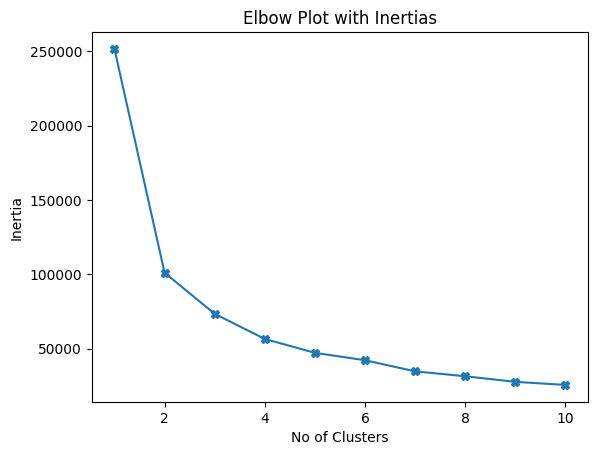

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
data = np.array(list(zip(X_train['Latitude'], X_train['Longitude'], X_train['MedInc'] )))

inertias = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, n_init='auto', random_state=0)
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='X')
plt.title('Elbow Plot with Inertias')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.show()


# Feature Extraction - Dimentionality Reduction

We could normalize our data and do Principal Component Analysis to reduce the number of features of our dataset. This is done by eliminating features having eigenvectors of same eigenvalues.



In [ ]:
from sklearn.decomposition import PCA

X_norm = (X - X.min()) / (X.max() - X.min())
pca = PCA(n_components=2) #2D dimensional PCA

transformed = pd.DataFrame(pca.fit_transform(X_norm)) #essentially .fit(X_norm).transform(X_norm)
transformed

,0,1
0,0.267184,0.648987
1,0.252400,0.282721
2,0.328713,0.585428
3,0.341324,0.536940
4,0.350373,0.503616
...,...,...
20635,0.447789,-0.270524
20636,0.436279,-0.325650
20637,0.429064,-0.328828
20638,0.439350,-0.325415


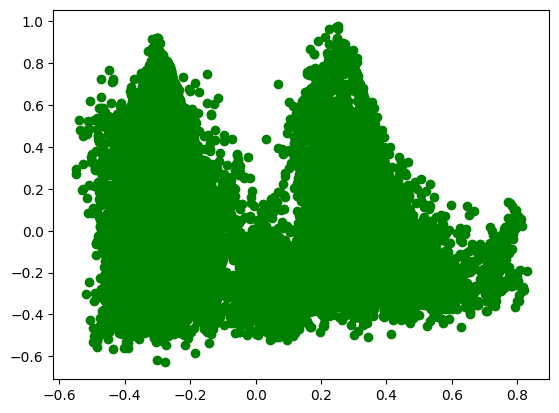

In [ ]:
x = transformed[0]
y = transformed[1]

plt.scatter(x, y, color='green')
plt.show()

<Axes: xlabel='0', ylabel='1'>

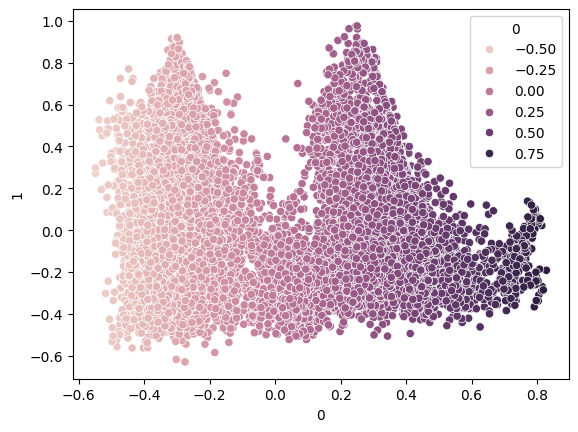

In [ ]:
sns.scatterplot(data=transformed, x=transformed[0], y=transformed[1], hue=x)

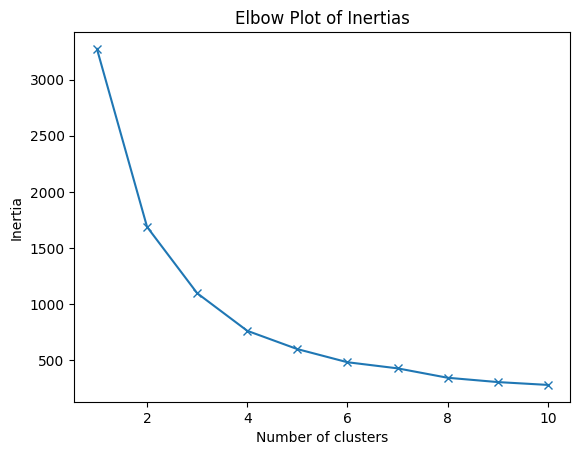

In [ ]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []
silhouette_scores = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, n_init='auto').fit(data)
  c = kmeans.labels_
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, silhouette_scores, marker='x')
plt.title('Elbow Plot of Inertias')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
from sklearn import metrics

kmeans = KMeans(n_clusters=8, n_init='auto', random_state=42).fit(data)
c = kmeans.labels_
metrics.silhouette_score(data, c)


0.3923908101280313

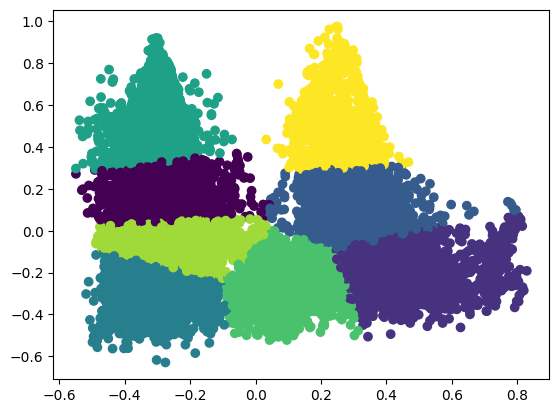

In [ ]:
c = kmeans.labels_
plt.scatter(x, y, c=kmeans.labels_)
plt.show()

#Using KMeans on another real dataset - Wine.csv

In [34]:
from google.colab import files
files.upload()

Saving wine.csv to wine.csv


{'wine.csv': b'1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065\n1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050\n1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185\n1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480\n1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735\n1,14.2,1.76,2.45,15.2,112,3.27,3.39,.34,1.97,6.75,1.05,2.85,1450\n1,14.39,1.87,2.45,14.6,96,2.5,2.52,.3,1.98,5.25,1.02,3.58,1290\n1,14.06,2.15,2.61,17.6,121,2.6,2.51,.31,1.25,5.05,1.06,3.58,1295\n1,14.83,1.64,2.17,14,97,2.8,2.98,.29,1.98,5.2,1.08,2.85,1045\n1,13.86,1.35,2.27,16,98,2.98,3.15,.22,1.85,7.22,1.01,3.55,1045\n1,14.1,2.16,2.3,18,105,2.95,3.32,.22,2.38,5.75,1.25,3.17,1510\n1,14.12,1.48,2.32,16.8,95,2.2,2.43,.26,1.57,5,1.17,2.82,1280\n1,13.75,1.73,2.41,16,89,2.6,2.76,.29,1.81,5.6,1.15,2.9,1320\n1,14.75,1.73,2.39,11.4,91,3.1,3.69,.43,2.81,5.4,1.25,2.73,1150\n1,14.38,1.87,2.38,12,102,3.3,3.64,.29,2.96,7.5,1.2,3,1547\n1,13.63,1.81,2.7,17.2,112,2.85,

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [38]:
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols',
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity',
         'Hue', 'OD280/OD315', 'Proline']

df = pd.read_csv("/content/wine.csv", names=cols)
df.head()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Note that Class column has a lot of duplicates, so drop that column

In [64]:
X = df.loc[:, df.columns != 'Class']
X

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [65]:
from sklearn.decomposition import PCA

X_norm = (X - X.min()) / (X.max() - X.min())

pca = PCA(n_components=2)
transformed_df = pd.DataFrame(pca.fit_transform(X_norm))

transformed_df

,0,1
0,-0.706336,-0.253193
1,-0.484977,-0.008823
2,-0.521172,-0.189187
3,-0.821644,-0.580906
4,-0.202546,-0.059467
...,...,...
173,0.739510,-0.471901
174,0.581781,-0.348366
175,0.626313,-0.546857
176,0.572991,-0.425516


<Axes: xlabel='0', ylabel='1'>

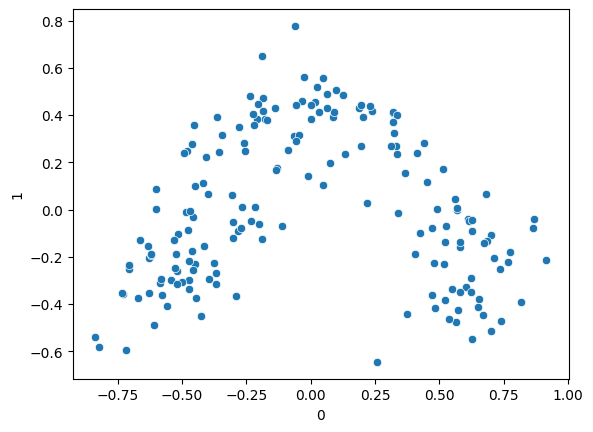

In [66]:
sns.scatterplot(data=transformed_df, x=transformed_df[0], y=transformed_df[1])

In [73]:
x = transformed_df[0]
y = transformed_df[1]

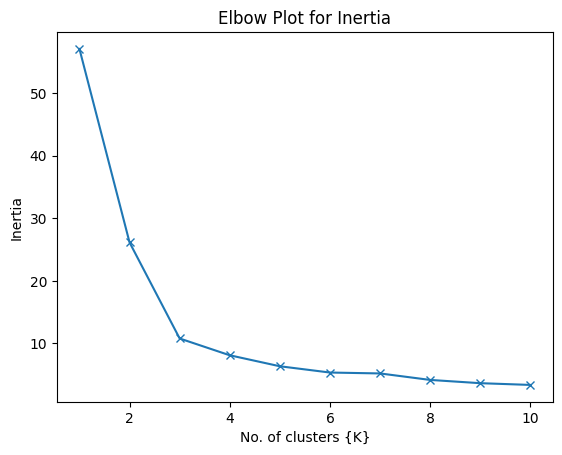

In [74]:
from sklearn.cluster import KMeans

data = np.array(list(zip(x,y)))
inertias = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, n_init='auto').fit(data)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='x')
plt.title('Elbow Plot for Inertia')
plt.xlabel('No. of clusters {K}')
plt.ylabel('Inertia')
plt.show()

In [88]:
from sklearn import metrics

x = transformed_df[0]
y = transformed_df[1]
silhouette = []

for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, n_init='auto').fit(data)
  c = kmeans.labels_
  silhouette.append(metrics.silhouette_score(data, c))

silhouette

[0.4936807702943249,
 0.5680591392935428,
 0.4901590386140555,
 0.45912412496270805,
 0.42789949655742937,
 0.3658781609060079,
 0.42162639781112177,
 0.38397407360312974,
 0.3536231068558424]

Here we can clearly see that for c_clusters=3 the silhouette coefficient > 0.5 hence it is the best score.

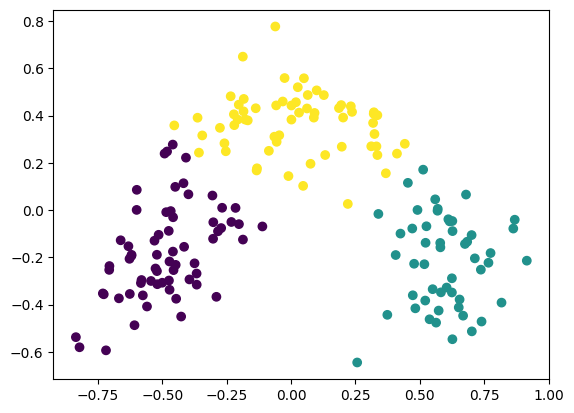

In [78]:
kmeans = KMeans(n_clusters=3, n_init='auto').fit(data)
c = kmeans.labels_
plt.scatter(x, y, c=kmeans.labels_)

#Cluster Evaluation with Ground Truth

**Rand Index**

Given the knowledge of the ground truth class assignments labels_true and our clustering algorithm assignments of the same samples labels_pred, the (adjusted or unadjusted) Rand index is a function that measures the similarity of the two assignments, ignoring permutations:

In [80]:
#Truth labels
Y = df['Class']
Y

#predicted labels
c = kmeans.labels_

labels_true = Y
labels_pred = c

metrics.rand_score(labels_true, labels_pred)

0.9318225099980956

The Rand index does not ensure to obtain a value close to 0.0 for a random labelling. The adjusted Rand index corrects for chance and will give such a baseline.



In [81]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.8470966807514034

**Mutual Information based scores**
The Mutual Information is a function that measures the agreement of the two assignments, ignoring permutations. Two different normalized versions of this measure are available, Normalized Mutual Information (NMI) and Adjusted Mutual Information (AMI). NMI is often used in the literature, while AMI was proposed more recently and is normalized against chance:

1. One can permute 0 and 1 in the predicted labels, rename 2 to 3 and get the same score

2. All, mutual_info_score, adjusted_mutual_info_score and normalized_mutual_info_score are symmetric: swapping the argument does not change the score.

3. Perfect labeling is scored 1.0; this is not true for mutual_info_score, which is therefore harder to judge.

4. Bad (e.g. independent labelings) have non-positive scores.


In [82]:
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

0.8329081448814434

**Homogeneity, completeness and V-measure**

* Homogeneity: Each cluster contains only members of a single class.
* Completeness: All members of a given class are assigned to the same cluster.
* Their harmonic mean called V-measure is computed by v_measure_score.

In [83]:
metrics.homogeneity_score(labels_true, labels_pred)

0.8374696534711392

In [84]:
metrics.completeness_score(labels_true, labels_pred)

0.8318668502263008

In [85]:
metrics.v_measure_score(labels_true, labels_pred)

0.8346588494891205

**Fowlkes-Mallows Score**

The Fowlkes-Mallows score FMI is defined as the geometric mean of the pairwise precision and recall.

1. The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.

2. One can permute 0 and 1 in the predicted labels, rename 2 to 3 and get the same score.

3. Perfect labeling is scored 1.0

4. Bad (e.g. independent labelings) have zero scores.


In [86]:
metrics.fowlkes_mallows_score(labels_true, labels_pred)

0.8984161365917068